# **Dogs vs. Cats : Deep Learning with Images**


---



Build a convolutional neural network to classify whether images contain either a dog or a cat.

**Explore the Example Data**


---


The 2,000 images used in this project are excerpted from the ["Dogs vs. Cats" dataset](https://www.kaggle.com/c/dogs-vs-cats) available on Kaggle, which contains 25,000 images. Here, we use a subset of the full dataset to decrease training time. 

In [0]:
import os
import zipfile

local_zip = '/content/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

base_dir = '/content/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

Let's find out the total number of cat and dog images in the `train` and `validation` directories:

In [2]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print('total training cat images :', len(os.listdir(train_cats_dir)))
print('total training dog images :', len(os.listdir(train_dogs_dir)))

print('total validation cat images :', len(os.listdir(validation_cats_dir)))
print('total validation dog images :', len(os.listdir(validation_dogs_dir)))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


**Building a Small Model from Scratch to Get to ~80% Accuracy**


---


Step 1 : Define a Sequential layer, adding some convolutional layers first.

In [0]:
%tensorflow_version 1.x

In [0]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])

Step 2 : Data preprocessing

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,  
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Step 3 : Training and control training by using Callbacks.



In [0]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.8):
      print("\nReached 80% accuracy so cancelling training!")
      self.model.stop_training = True
      
callbacks = myCallback()

In [7]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  
      epochs=100,
      verbose=2,
      validation_data = validation_generator,
      validation_steps=50, 
      callbacks=[callbacks])

Epoch 1/100
Epoch 1/100
100/100 - 21s - loss: 0.6932 - acc: 0.5135 - val_loss: 0.6938 - val_acc: 0.4990
Epoch 2/100
Epoch 1/100
100/100 - 18s - loss: 0.6785 - acc: 0.5650 - val_loss: 0.6528 - val_acc: 0.6220
Epoch 3/100
Epoch 1/100
100/100 - 18s - loss: 0.6653 - acc: 0.5825 - val_loss: 0.6525 - val_acc: 0.6020
Epoch 4/100
Epoch 1/100
100/100 - 18s - loss: 0.6545 - acc: 0.6120 - val_loss: 0.6236 - val_acc: 0.6450
Epoch 5/100
Epoch 1/100
100/100 - 18s - loss: 0.6498 - acc: 0.6095 - val_loss: 0.6096 - val_acc: 0.6610
Epoch 6/100
Epoch 1/100
100/100 - 18s - loss: 0.6337 - acc: 0.6370 - val_loss: 0.6152 - val_acc: 0.6560
Epoch 7/100
Epoch 1/100
100/100 - 18s - loss: 0.6239 - acc: 0.6520 - val_loss: 0.5874 - val_acc: 0.6920
Epoch 8/100
Epoch 1/100
100/100 - 18s - loss: 0.6037 - acc: 0.6665 - val_loss: 0.6059 - val_acc: 0.6520
Epoch 9/100
Epoch 1/100
100/100 - 17s - loss: 0.5989 - acc: 0.6740 - val_loss: 0.6050 - val_acc: 0.6630
Epoch 10/100
Epoch 1/100
100/100 - 18s - loss: 0.5905 - acc: 0.6

**Evaluating Accuracy and Loss for the Model**


---


Let's plot the training/validation accuracy and loss as collected during training:

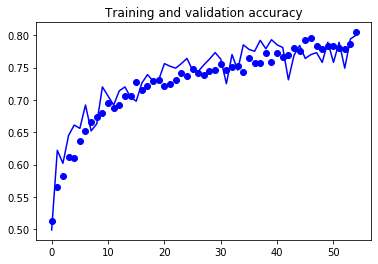

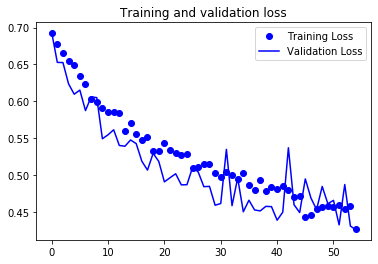

In [8]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**Test the Dogs vs. Cats classifier**

[1.]
It is a dog.


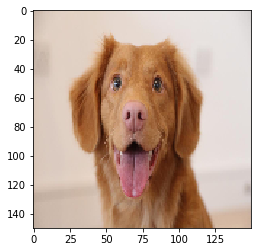

In [9]:
import numpy as np
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image

img_path = '/content/new_image.jpg'
img = image.load_img(img_path, target_size=(150, 150))
imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images, batch_size=10)
  
print(classes[0])
  
if classes[0]>0:
   print("It is a dog.")
    
else:
   print("It is a cat.")
 